# PLSR Analysis to determine features predictive of axis number

This block imports all the necessary Python libraries for data manipulation, plotting, and custom functions (from organoid_prediction_python). It also sets some Matplotlib parameters for higher-quality figures. The main dataset and a translation frame (for column renaming) are loaded from specified locations

In [1]:
import organoid_prediction_python as opp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
table_location = home_directory + "tabular_data"

translation_frame = pd.read_csv("translation_dataframe_timepoints.csv")
name_mapping = {key:new_key for key,new_key in zip(translation_frame["original_names"],translation_frame["plot_names"])}

data = pd.read_csv(f"{table_location}/All_Samples_Feature_Space_All_Features_48h,72h,96h_Normalised_per_Timepoint.csv")
data

,Run,Plate,ID,048h_raw_BF_AreaShape_area,048h_raw_BF_AreaShape_aspect_ratio,048h_raw_BF_AreaShape_axis_major_length,048h_raw_BF_AreaShape_axis_minor_length,048h_raw_BF_AreaShape_eccentricity,048h_raw_BF_AreaShape_feret_diameter_max,048h_raw_BF_AreaShape_perimeter,...,096h_str_BF_AreaShape_moments_hu_1,096h_str_BF_AreaShape_moments_hu_2,096h_str_BF_AreaShape_moments_hu_3,096h_str_BF_AreaShape_moments_hu_4,096h_str_BF_AreaShape_moments_hu_5,096h_str_BF_AreaShape_moments_hu_6,096h_str_BF_AreaShape_orientation,096h_str_BF_AreaShape_perimeter,096h_str_CH_AreaShape_Bra_MajorAxis_Polarisation,096h_str_CH_AreaShape_Bra_MinorAxis_Polarisation
0,RR,1,A1,0.754091,-0.889636,0.132588,1.204628,-1.000051,0.007074,0.615519,...,-0.769984,-0.768314,-0.188818,-0.081040,-0.108285,-0.018937,0.218694,0.485603,-0.237483,0.204173
1,RR,1,A2,-0.783470,-1.252670,-1.238409,0.003129,-1.752936,-1.131530,-0.724230,...,-0.587974,0.518118,-0.142104,-0.080919,-0.108023,0.017986,-1.310831,-0.276812,-0.930821,1.071650
2,RR,1,A3,1.636441,-0.184192,1.186196,1.565451,-0.008740,1.127225,1.795347,...,-0.724302,-0.679043,-0.186519,-0.081045,-0.108504,-0.019001,-0.638784,0.014028,0.406917,-0.068697
3,RR,1,A4,-0.525754,-0.513477,-0.672134,-0.202863,-0.422446,-0.849309,-0.402853,...,0.276192,-0.326314,0.038707,-0.073034,-0.013521,0.038021,0.362758,0.652506,0.992505,-0.551399
4,RR,1,A5,0.537872,-0.248943,0.294790,0.612413,-0.084969,0.059492,0.498737,...,0.544892,-0.696050,-0.161387,-0.081127,-0.113141,-0.013480,-0.324894,-1.090064,0.285818,-0.643907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,TR,2,H8,-0.342295,-0.103644,-0.319022,-0.266071,0.083062,-0.511010,-0.233997,...,-0.240030,1.252083,-0.031233,-0.076766,-0.095753,0.232280,-0.531978,0.936472,-1.056426,0.770934
763,TR,2,H9,-0.925432,1.281638,-0.116354,-1.536867,1.304509,-0.330223,-1.009869,...,-0.010842,0.858318,-0.018204,-0.084586,-0.137911,0.247706,0.371618,1.965908,0.143556,0.712064
764,TR,2,H10,-1.873304,-1.279234,-2.131125,-1.049808,-1.821515,-2.016265,-1.929328,...,-0.454779,1.044578,-0.117763,-0.082320,-0.115499,0.052699,0.177291,1.923294,-1.128242,-0.816051
765,TR,2,H11,-2.408392,-0.915375,-2.411391,-1.803167,-1.045366,-2.414625,-2.306480,...,1.523053,0.369209,0.161155,-0.101456,-0.309307,0.338411,-0.341009,1.652660,-0.982778,1.840169


Here, the code loads an annotations file, which probably contains annotations for the data in the main dataset. It also renames the types of runs from "Real_Run" to "RR" and "Trial_Run" to "TR". Rows where the Morph_Class is not available (NA_NA) are filtered out. Finally, this annotation data is merged with the main dataset using the unique indices ("Run", "Plate", "ID").

In [2]:
annotations = table_location + "/annotations_with_indices.csv"
annotation_df = pd.read_csv(annotations)
mapping = {"Real_Run":"RR", "Trial_Run":"TR"}
annotation_df["Run"] = [mapping[value] for value in annotation_df["Run"].to_numpy()]
no_na_annot = annotation_df[annotation_df["Morph_Class"]!="NA_NA"]

data_annotated = data.set_index(["Run","Plate","ID"]).merge(no_na_annot,on=["Run","Plate","ID"])
data_annotated

,Run,Plate,ID,048h_raw_BF_AreaShape_area,048h_raw_BF_AreaShape_aspect_ratio,048h_raw_BF_AreaShape_axis_major_length,048h_raw_BF_AreaShape_axis_minor_length,048h_raw_BF_AreaShape_eccentricity,048h_raw_BF_AreaShape_feret_diameter_max,048h_raw_BF_AreaShape_perimeter,...,096h_str_BF_AreaShape_moments_hu_4,096h_str_BF_AreaShape_moments_hu_5,096h_str_BF_AreaShape_moments_hu_6,096h_str_BF_AreaShape_orientation,096h_str_BF_AreaShape_perimeter,096h_str_CH_AreaShape_Bra_MajorAxis_Polarisation,096h_str_CH_AreaShape_Bra_MinorAxis_Polarisation,Axes,Morph,Morph_Class
0,RR,1,A1,0.754091,-0.889636,0.132588,1.204628,-1.000051,0.007074,0.615519,...,-0.081040,-0.108285,-0.018937,0.218694,0.485603,-0.237483,0.204173,single,good,single_good
1,RR,1,A2,-0.783470,-1.252670,-1.238409,0.003129,-1.752936,-1.131530,-0.724230,...,-0.080919,-0.108023,0.017986,-1.310831,-0.276812,-0.930821,1.071650,single,bad,single_bad
2,RR,1,A3,1.636441,-0.184192,1.186196,1.565451,-0.008740,1.127225,1.795347,...,-0.081045,-0.108504,-0.019001,-0.638784,0.014028,0.406917,-0.068697,single,bad,single_bad
3,RR,1,A4,-0.525754,-0.513477,-0.672134,-0.202863,-0.422446,-0.849309,-0.402853,...,-0.073034,-0.013521,0.038021,0.362758,0.652506,0.992505,-0.551399,single,good,single_good
4,RR,1,A5,0.537872,-0.248943,0.294790,0.612413,-0.084969,0.059492,0.498737,...,-0.081127,-0.113141,-0.013480,-0.324894,-1.090064,0.285818,-0.643907,single,bad,single_bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,TR,2,H8,-0.342295,-0.103644,-0.319022,-0.266071,0.083062,-0.511010,-0.233997,...,-0.076766,-0.095753,0.232280,-0.531978,0.936472,-1.056426,0.770934,unclassified,unclassified,unclassified_unclassified
434,TR,2,H9,-0.925432,1.281638,-0.116354,-1.536867,1.304509,-0.330223,-1.009869,...,-0.084586,-0.137911,0.247706,0.371618,1.965908,0.143556,0.712064,single,good,single_good
435,TR,2,H10,-1.873304,-1.279234,-2.131125,-1.049808,-1.821515,-2.016265,-1.929328,...,-0.082320,-0.115499,0.052699,0.177291,1.923294,-1.128242,-0.816051,double,unclassified,double_unclassified
436,TR,2,H11,-2.408392,-0.915375,-2.411391,-1.803167,-1.045366,-2.414625,-2.306480,...,-0.101456,-0.309307,0.338411,-0.341009,1.652660,-0.982778,1.840169,single,good,single_good


This block filters the annotated data to remove unclassified or incomplete entries. It also drops irrelevant columns based on specific keywords and prints out the count of each 'Axes' type in the dataset. Finally, we also drop all features relating to the 96h timepoint

In [3]:
dat_axes = data_annotated[data_annotated["Axes"] != "unclassified"]
dat_axes = dat_axes[dat_axes ['048h_raw_BF_AreaShape_area'].notna()].dropna(axis=1).dropna()
dat_axes = dat_axes.drop([key for key in dat_axes.keys() if any([term in key for term in ["Location","orientation","_X","_Y","UMAP","PC","096h"]])],axis=1)
dat_axes

counts = dat_axes.groupby("Axes")["Run"].count()
print(counts)

Axes
double    136
single    256
Name: Run, dtype: int64


This block separates the feature matrix X and the target vector Y from the filtered dataset. X contains the features needed for model training, and Y contains the binary classification for 'single' in 'Axes'.

In [4]:
gt_keys = ["Run","Plate","ID","Axes","Morph","Morph_Class"]
X = dat_axes.drop(gt_keys,axis=1).rename(columns = name_mapping)
Y = pd.get_dummies(dat_axes["Axes"])["single"]
Y

0       True
1       True
2       True
3       True
4       True
       ...  
431    False
434     True
435    False
436     True
437    False
Name: single, Length: 392, dtype: bool

This block imports the necessary modules for Partial Least Squares Regression (PLSR) and data scaling. It then initializes and fits a PLSR model using the standardized feature matrix X and target vector Y.

In [5]:
# import PLSRegression from scikitlearn
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
# fit the pls regression
my_plsr = PLSRegression(n_components=2, scale=False)
my_plsr.fit(StandardScaler().fit_transform(X), Y)

PLSRegression(scale=False)

This block extracts the PLSR scores into a DataFrame and then standardizes these scores for the first and second components. The standardization is done to scale the scores between -1 and 1, which is useful for plotting or further analysis.

In [6]:
# extract scores (one score per individual per component)
scores_df = pd.DataFrame(my_plsr.x_scores_)

# standardize scores between -1 and 1 so they fit on the plot
std_scores_dim1 = 2 * ( (scores_df[0] - min(scores_df[0])) / (max(scores_df[0]) - min(scores_df[0])) ) -1
std_scores_dim2 = 2 * ( (scores_df[1] - min(scores_df[1])) / (max(scores_df[1]) - min(scores_df[1])) ) -1



This block imports a utility for custom colormaps from Matplotlib. It then loads a custom colormap saved as a NumPy array and converts it into a Seaborn color palette for future use.

In [7]:
from matplotlib.colors import ListedColormap
cmap_hex = np.load("custom_colormap(blur,orange,red,ice).npy")
cmap = sns.palettes.color_palette(cmap_hex[2:])
cmap

[(0.7294117647058823, 0.19607843137254902, 0.4),
 (0.06666666666666667, 0.7490196078431373, 0.6235294117647059)]

Creates a biplot using Seaborn's jointplot to visualize the standardized PLSR scores along the first and second dimensions. The points are colored based on their 'Axes' labels ("double" or "single"). The plot is then saved as a PDF

meta NOT subset; don't know how to subset; dropped


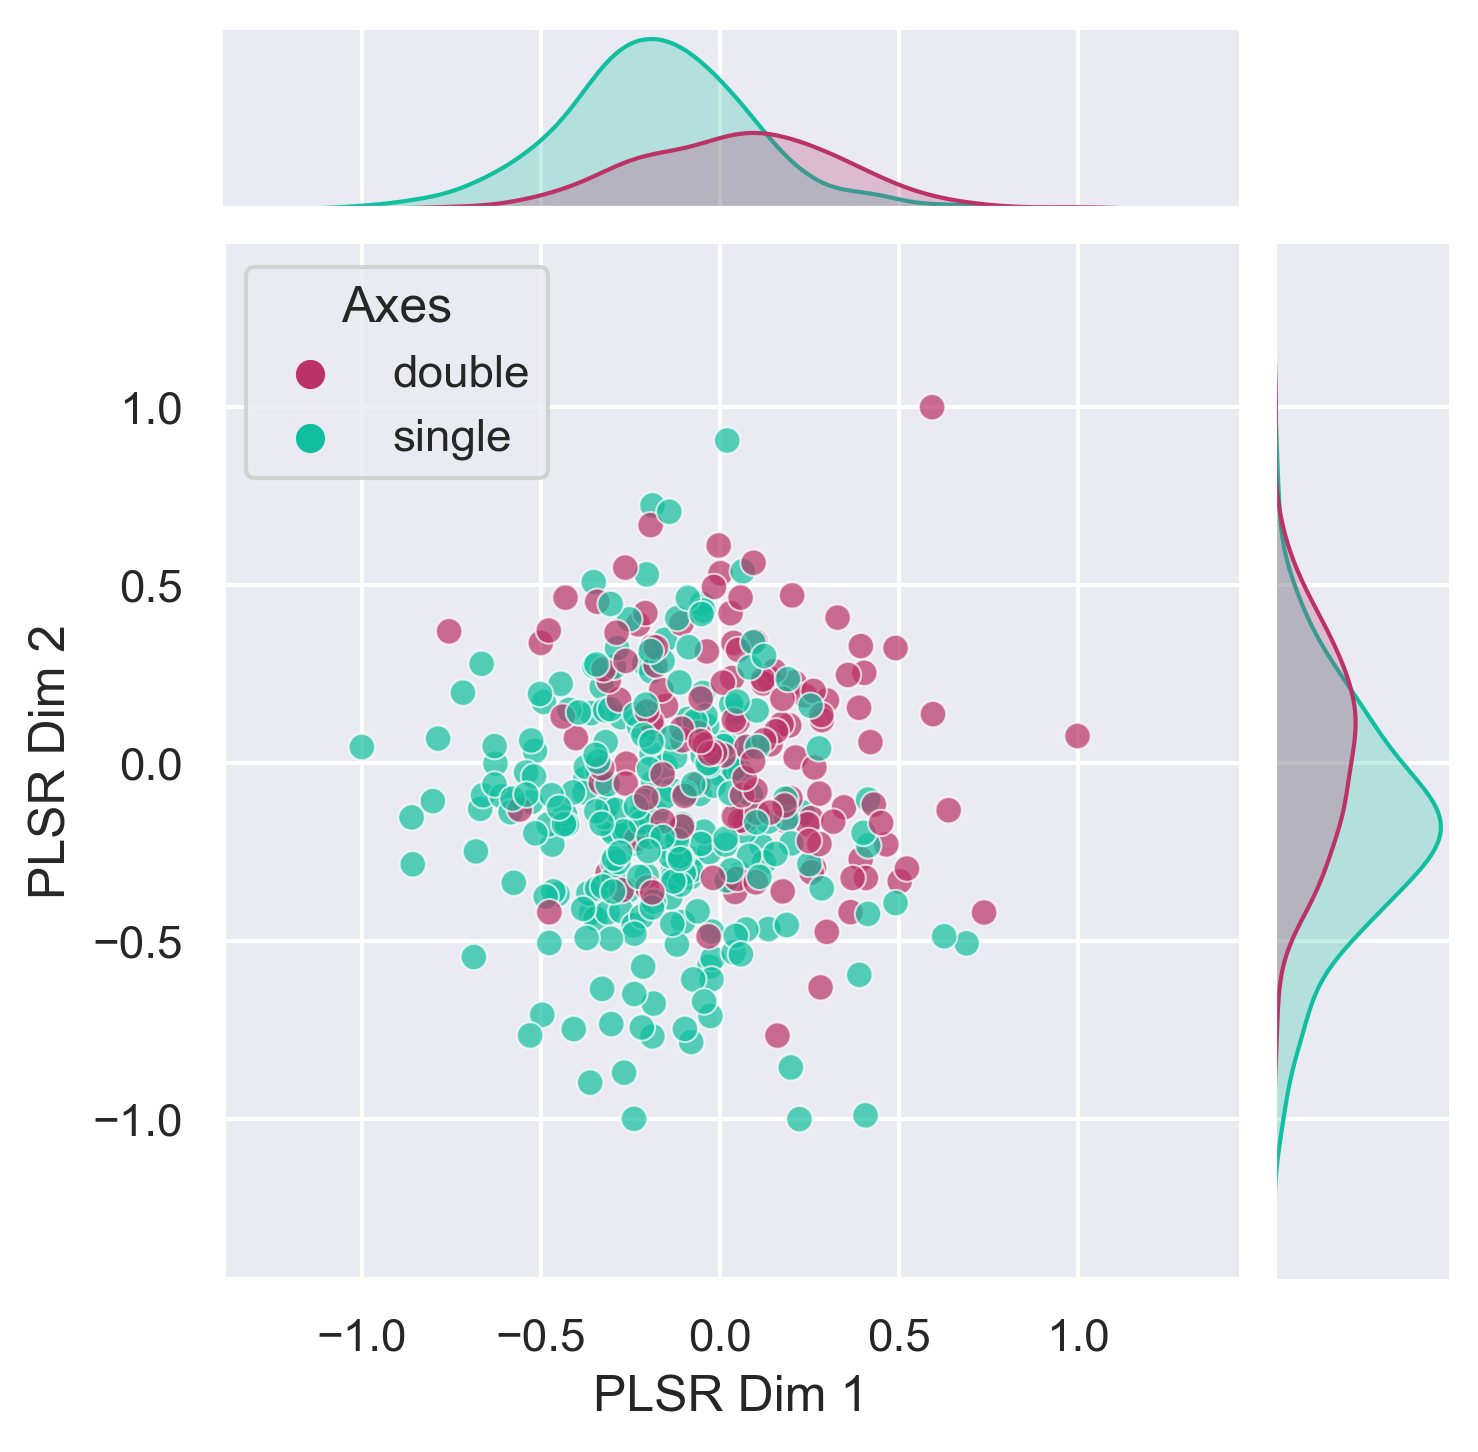

In [8]:
# create the biplot by plotting each data point individualle (one by one)
import matplotlib as mpl
import seaborn as sns

out_PLSR = f"{home_directory}/Plots/PLSR Feature Plots/"

sns.set()

df_components = pd.DataFrame(
    {
        "Single":Y.to_numpy().astype(bool),
        "Axes":dat_axes["Axes"].to_numpy(),
        "Run":dat_axes["Run"].to_numpy(),
        "PLSR Dim 1":std_scores_dim1,
        "PLSR Dim 2":std_scores_dim2,
    }
)

sns.jointplot(df_components,x="PLSR Dim 1",y="PLSR Dim 2",hue="Axes", **{"alpha":0.7,"s":40},height=5,hue_order=["double","single"],palette=cmap,)
plt.savefig(f"{out_PLSR}/PLSR Axes components early features.pdf", format="pdf", bbox_inches="tight")
plt.show()

Extracts the loadings from the fitted PLSR model and saves them into a DataFrame. This DataFrame is then saved as a CSV file. Loadings give insights into the relationship between the original variables and the PLSR dimensions.

In [9]:
#extract loadings (one loading per variable per component)
loadings_df = pd.DataFrame(my_plsr.x_loadings_,index=X.columns,columns=["PLSR Dim 1","PLSR Dim 2"])
print(np.min(loadings_df),np.max(loadings_df))

-0.270510024792432 0.25455941865569653


# Main Contributors (0.05 and 0.95 percentile)

Identifies the main contributing variables to the PLSR model based on the 5th and 95th percentiles of the loadings. A heatmap is then generated to visualize these main contributors, and the plot is saved as a PDF.

meta NOT subset; don't know how to subset; dropped


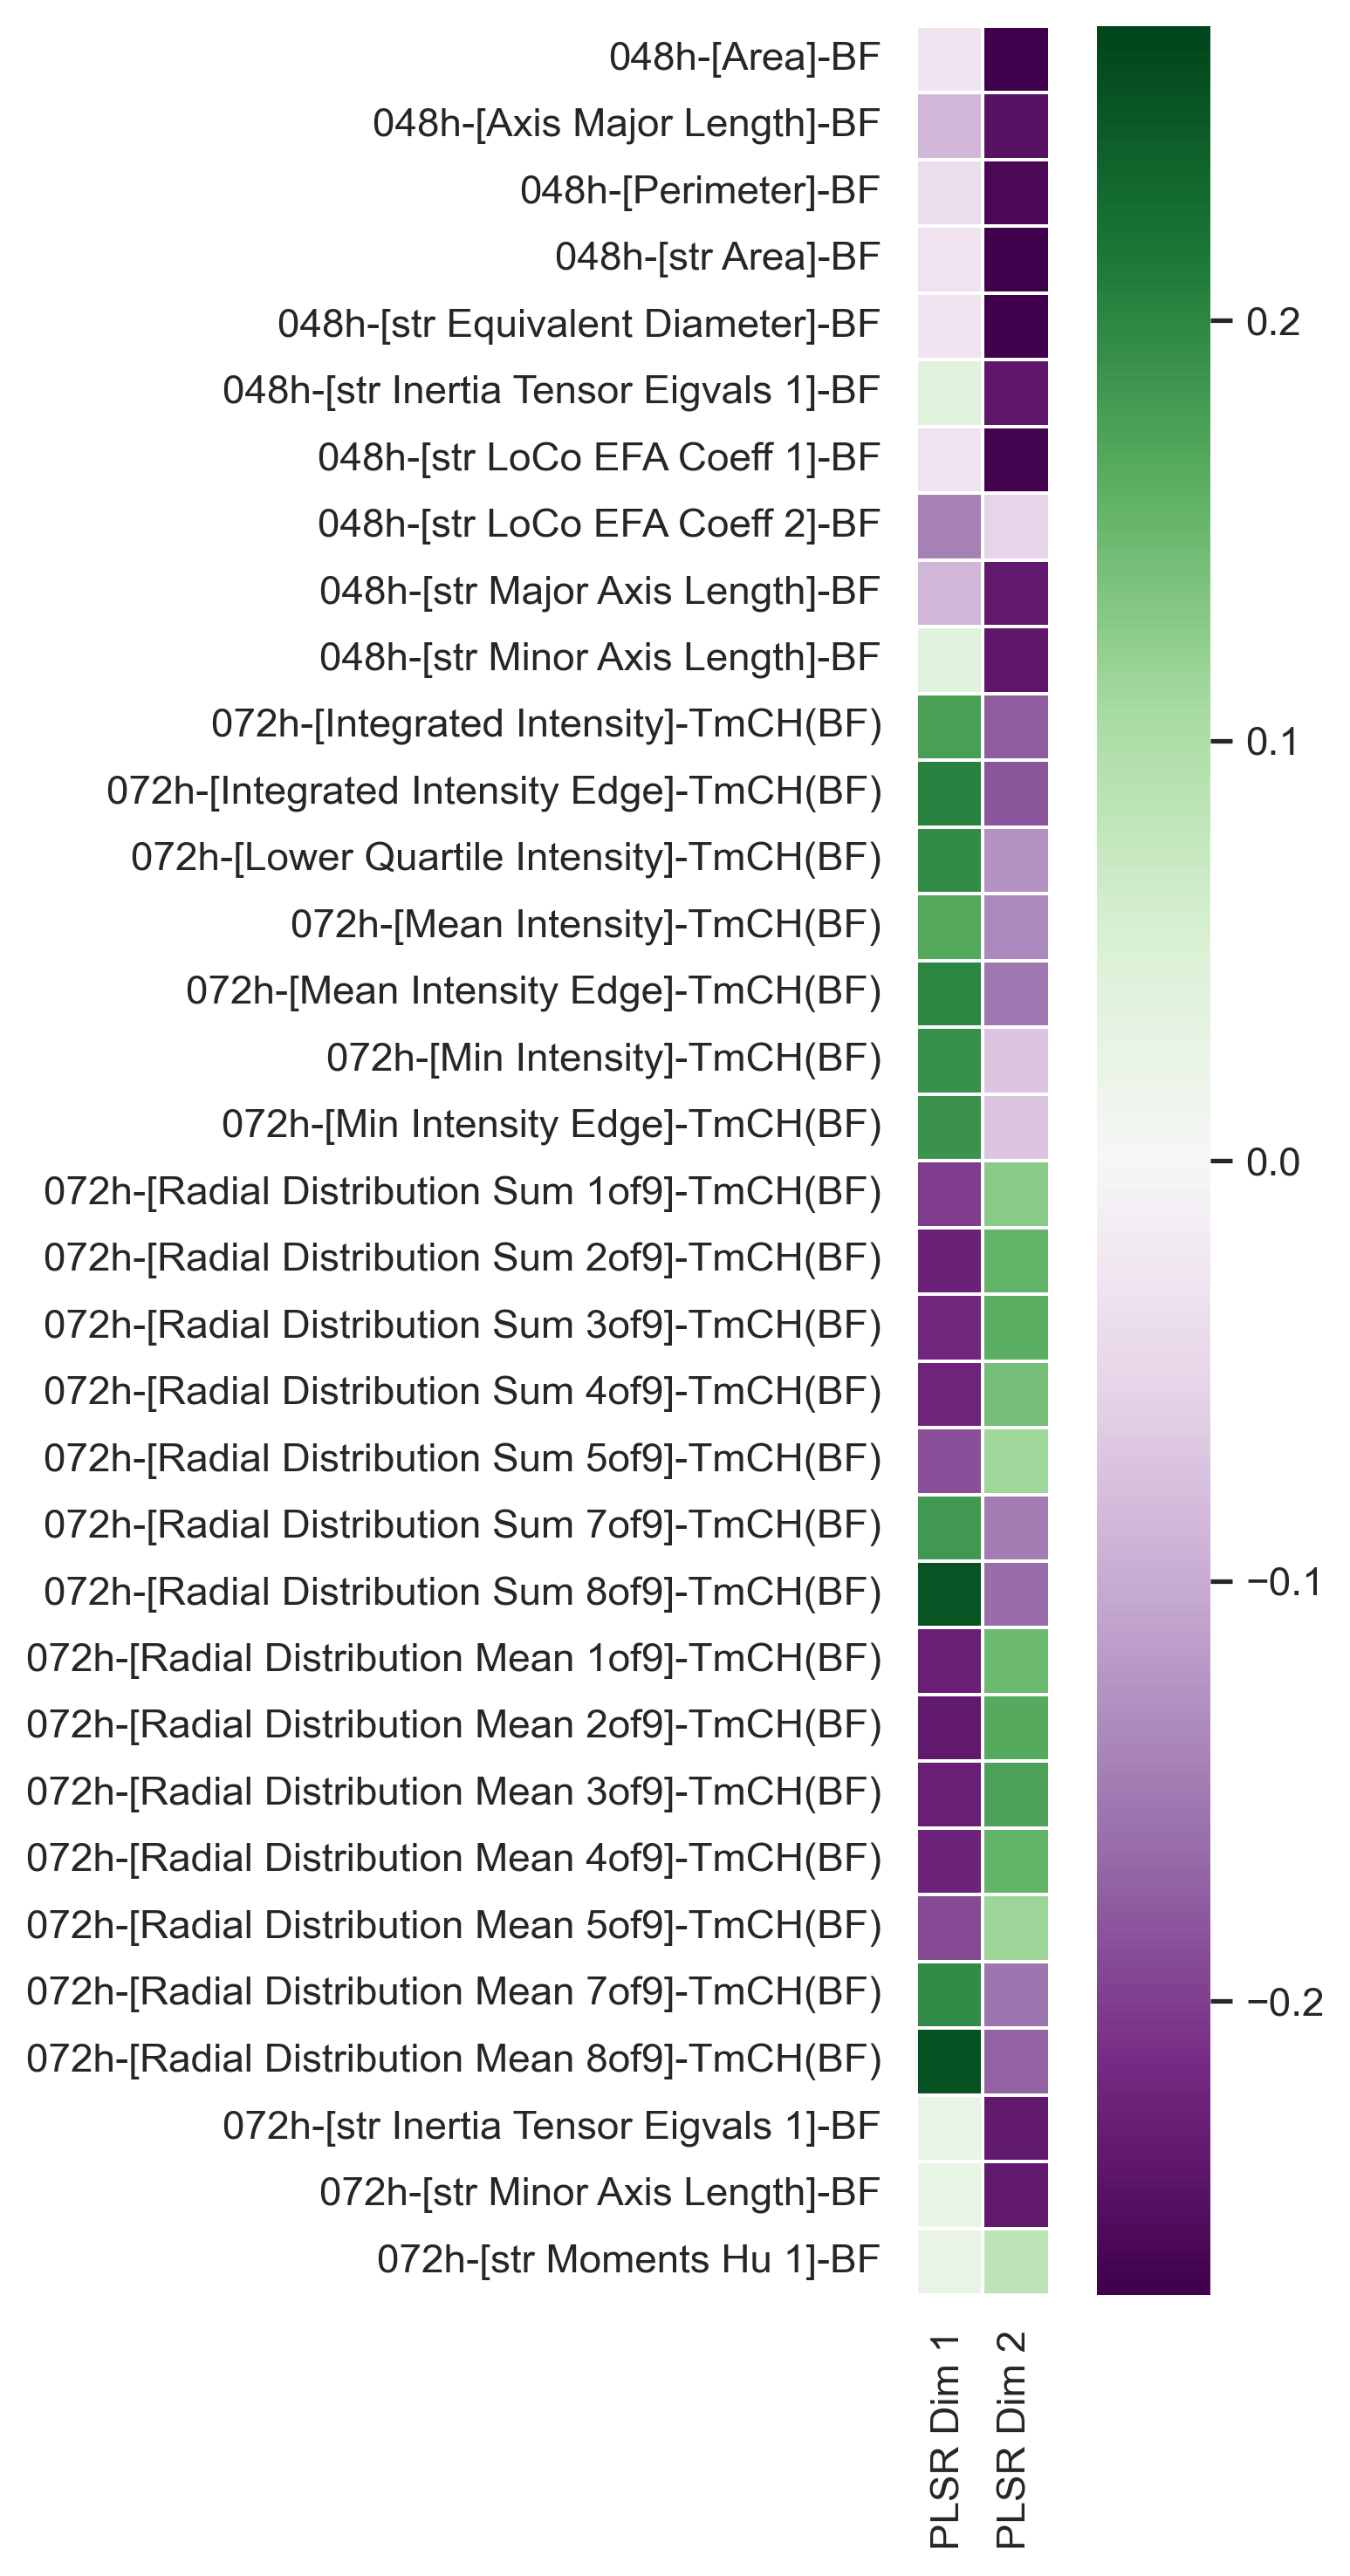

In [10]:
quantiles_upper = np.quantile(loadings_df,0.95,axis=0)
quantiles_lower = np.quantile(loadings_df,0.05,axis=0)
main_contributers = [
    key for key in loadings_df.index if (
        loadings_df.loc[key][0]>=quantiles_upper[0] or 
        loadings_df.loc[key][1]>=quantiles_upper[1] or 
        loadings_df.loc[key][0]<=quantiles_lower[0] or 
        loadings_df.loc[key][1]<=quantiles_lower[1]
    )
]

fig,ax = plt.subplots(1,1,figsize = (5,10))

sns.heatmap(loadings_df.loc[main_contributers], cmap = "PRGn",vmin=-0.27, vmax=0.27, xticklabels='auto', yticklabels='auto', ax=ax,linewidths=0.5,square=True)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig(f"{out_PLSR}/PLSR Axes early features loadings 0.05 quantile.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [11]:
main_contributers_morph = ['048h-[Area]-BF',
 '048h-[Axis Major Length]-BF',
 '048h-[Feret Diameter Max]-BF',
 '048h-[Perimeter]-BF',
 '048h-[str Area]-BF',
 '048h-[str Equivalent Diameter]-BF',
 '048h-[str Inertia Tensor 1 1]-BF',
 '048h-[str Inertia Tensor Eigvals 0]-BF',
 '048h-[str LoCo EFA Coeff 1]-BF',
 '048h-[str Major Axis Length]-BF',
 '072h-[Area]-BF',
 '072h-[Perimeter]-BF',
 '072h-[Integrated Intensity]-TmCH(BF)',
 '072h-[Integrated Intensity Edge]-TmCH(BF)',
 '072h-[Lower Quartile Intensity]-TmCH(BF)',
 '072h-[Max Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity]-TmCH(BF)',
 '072h-[Mean Intensity Edge]-TmCH(BF)',
 '072h-[Median Intensity]-TmCH(BF)',
 '072h-[Min Intensity]-TmCH(BF)',
 '072h-[Min Intensity Edge]-TmCH(BF)',
 '072h-[Std Intensity]-TmCH(BF)',
 '072h-[Upper Quartile Intensity]-TmCH(BF)',
 '072h-[Radial Distribution Sum 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 4of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 5of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 9of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 4of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 5of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 9of9]-TmCH(BF)',
 '072h-[Radial Distribution Radial CV 6of9]-TmCH(BF)',
 '072h-[str Area]-BF',
 '072h-[str Equivalent Diameter]-BF',
 '072h-[str Inertia Tensor Eigvals 1]-BF',
 '072h-[str LoCo EFA Coeff 1]-BF',
 '072h-[str Perimeter]-BF']

axes_and_morph_contributers = sorted(list(set(main_contributers_morph).union(set(main_contributers))))
axes_and_morph_contributers

['048h-[Area]-BF',
 '048h-[Axis Major Length]-BF',
 '048h-[Feret Diameter Max]-BF',
 '048h-[Perimeter]-BF',
 '048h-[str Area]-BF',
 '048h-[str Equivalent Diameter]-BF',
 '048h-[str Inertia Tensor 1 1]-BF',
 '048h-[str Inertia Tensor Eigvals 0]-BF',
 '048h-[str Inertia Tensor Eigvals 1]-BF',
 '048h-[str LoCo EFA Coeff 1]-BF',
 '048h-[str LoCo EFA Coeff 2]-BF',
 '048h-[str Major Axis Length]-BF',
 '048h-[str Minor Axis Length]-BF',
 '072h-[Area]-BF',
 '072h-[Integrated Intensity Edge]-TmCH(BF)',
 '072h-[Integrated Intensity]-TmCH(BF)',
 '072h-[Lower Quartile Intensity]-TmCH(BF)',
 '072h-[Max Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity]-TmCH(BF)',
 '072h-[Median Intensity]-TmCH(BF)',
 '072h-[Min Intensity Edge]-TmCH(BF)',
 '072h-[Min Intensity]-TmCH(BF)',
 '072h-[Perimeter]-BF',
 '072h-[Radial Distribution Mean 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 3of9]-TmCH(BF)',
 '072h-[Radial Di

Generates a heatmap similar to the one in Code Block 15 but now includes both the original main contributors (main_contributers) and the newly defined morphological contributors (main_contributers_morph). This heatmap is also saved as a PDF.

In [12]:
loadings_df.loc[axes_and_morph_contributers].to_excel(r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\tabular_data\PLSR Axes early features loadings 0.05 quantile.xlsx")

meta NOT subset; don't know how to subset; dropped


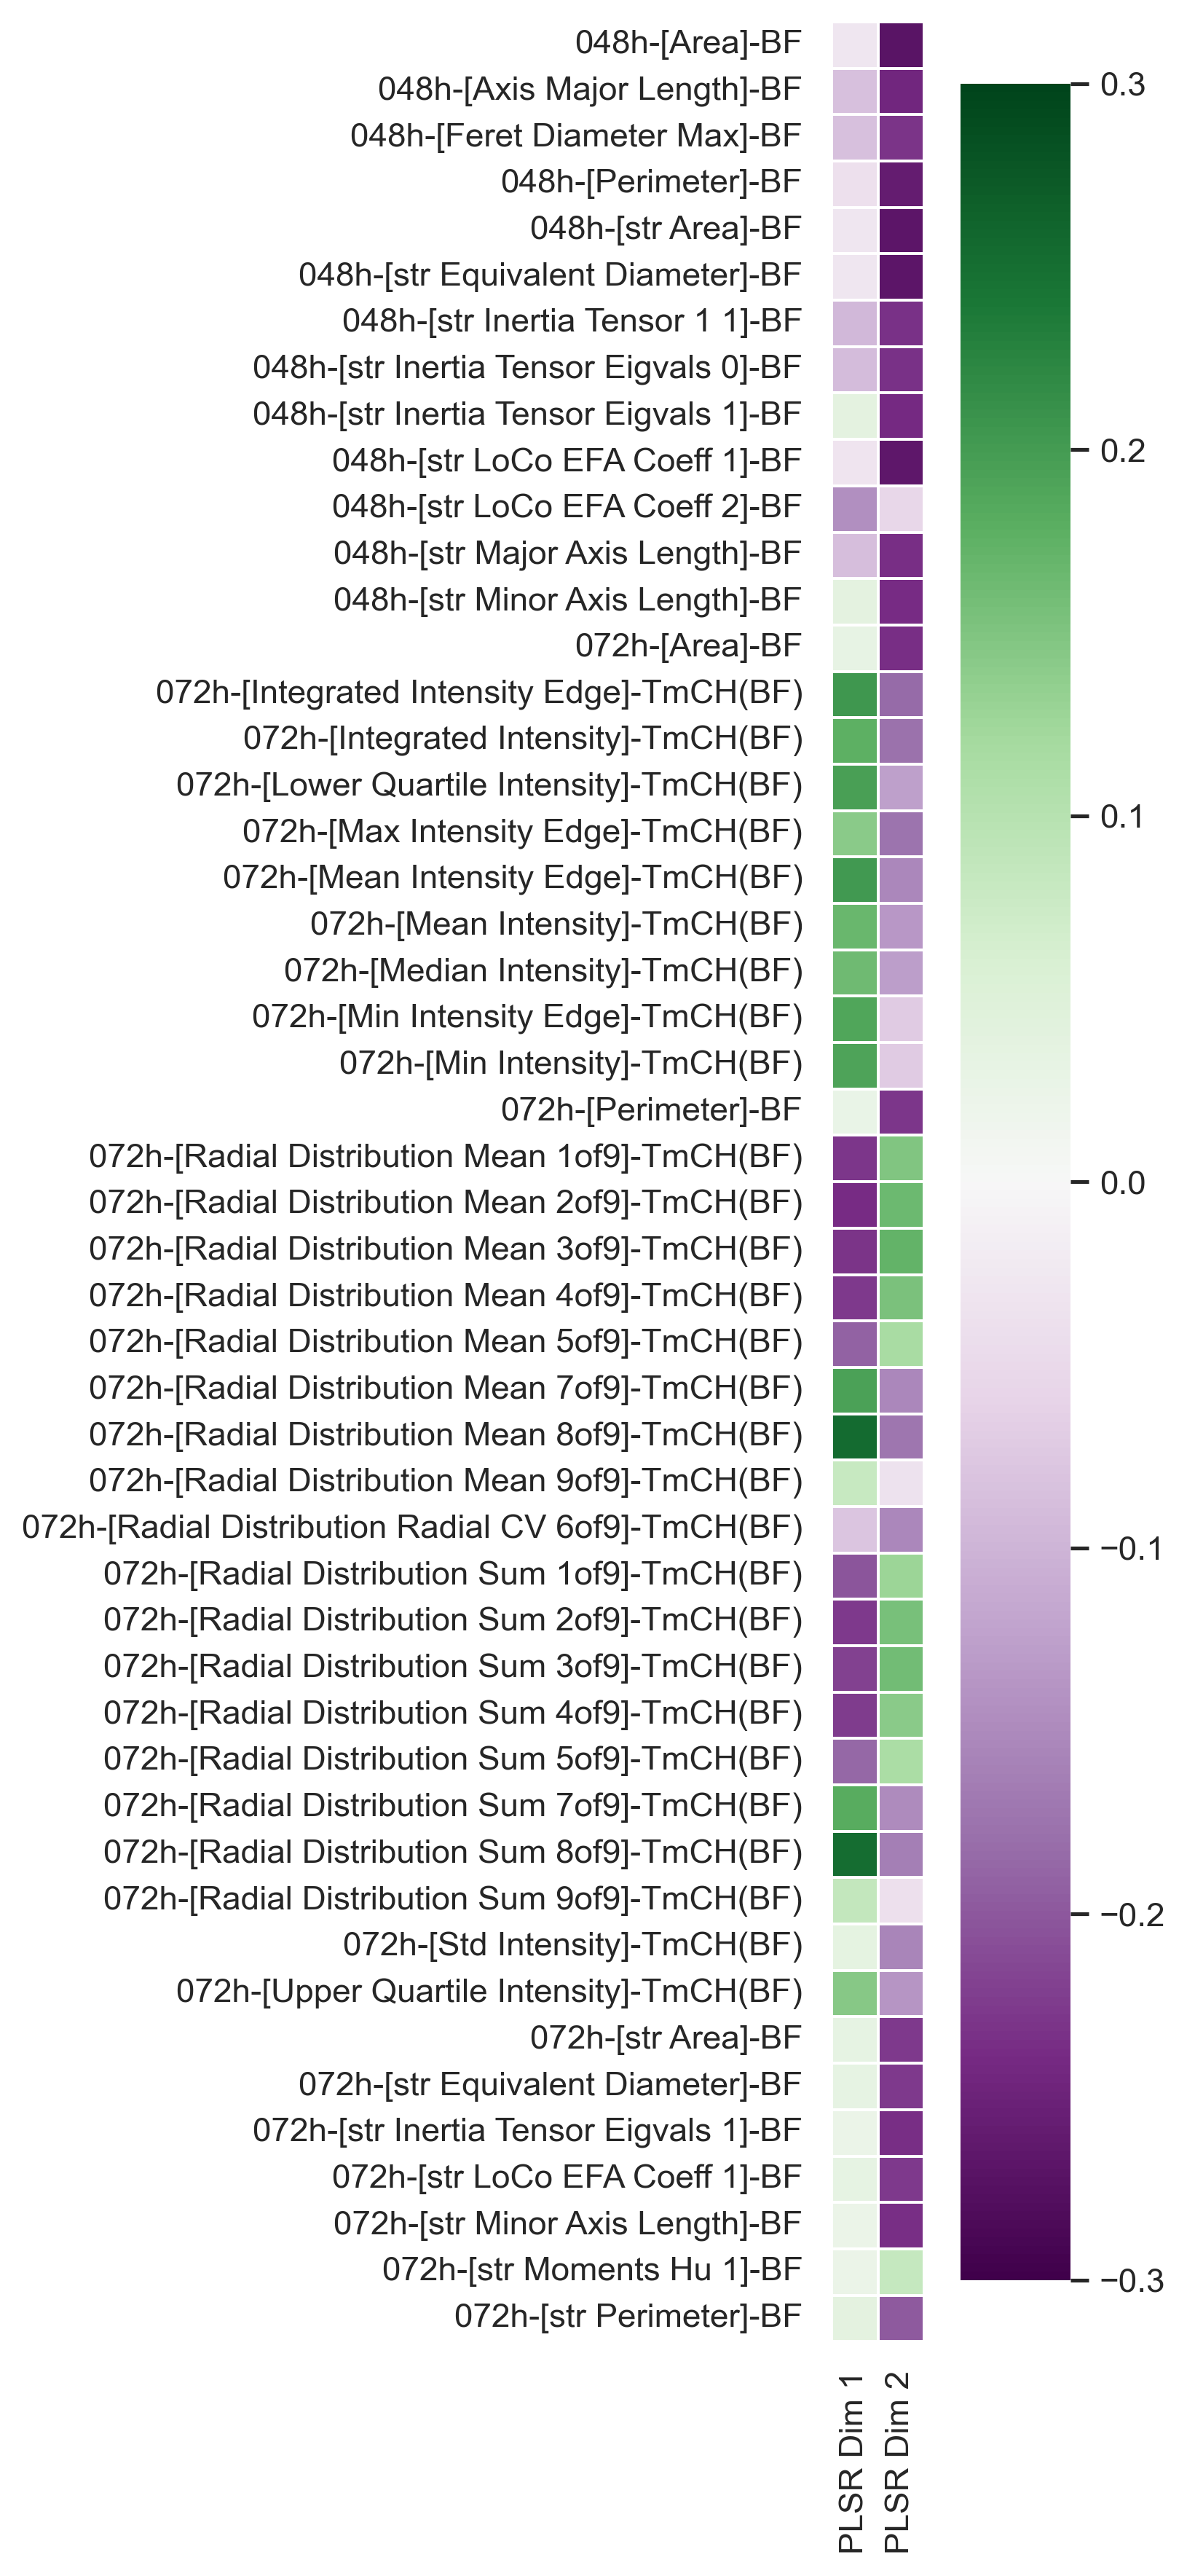

In [13]:
fig,ax = plt.subplots(1,1,figsize = (5,12))

sns.heatmap(loadings_df.loc[axes_and_morph_contributers], cmap = "PRGn",vmin=-0.3, vmax=0.3, xticklabels='auto', yticklabels='auto', ax=ax,linewidths=0.5,square=True)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig(f"{out_PLSR}/PLSR Axes early features loadings 0.05 quantile axes and morph.pdf", format="pdf", bbox_inches="tight")
plt.show()

Generates a heatmap to visualize the correlations among the main contributing variables. The heatmap uses a diverging color scale to indicate both positive and negative correlations.

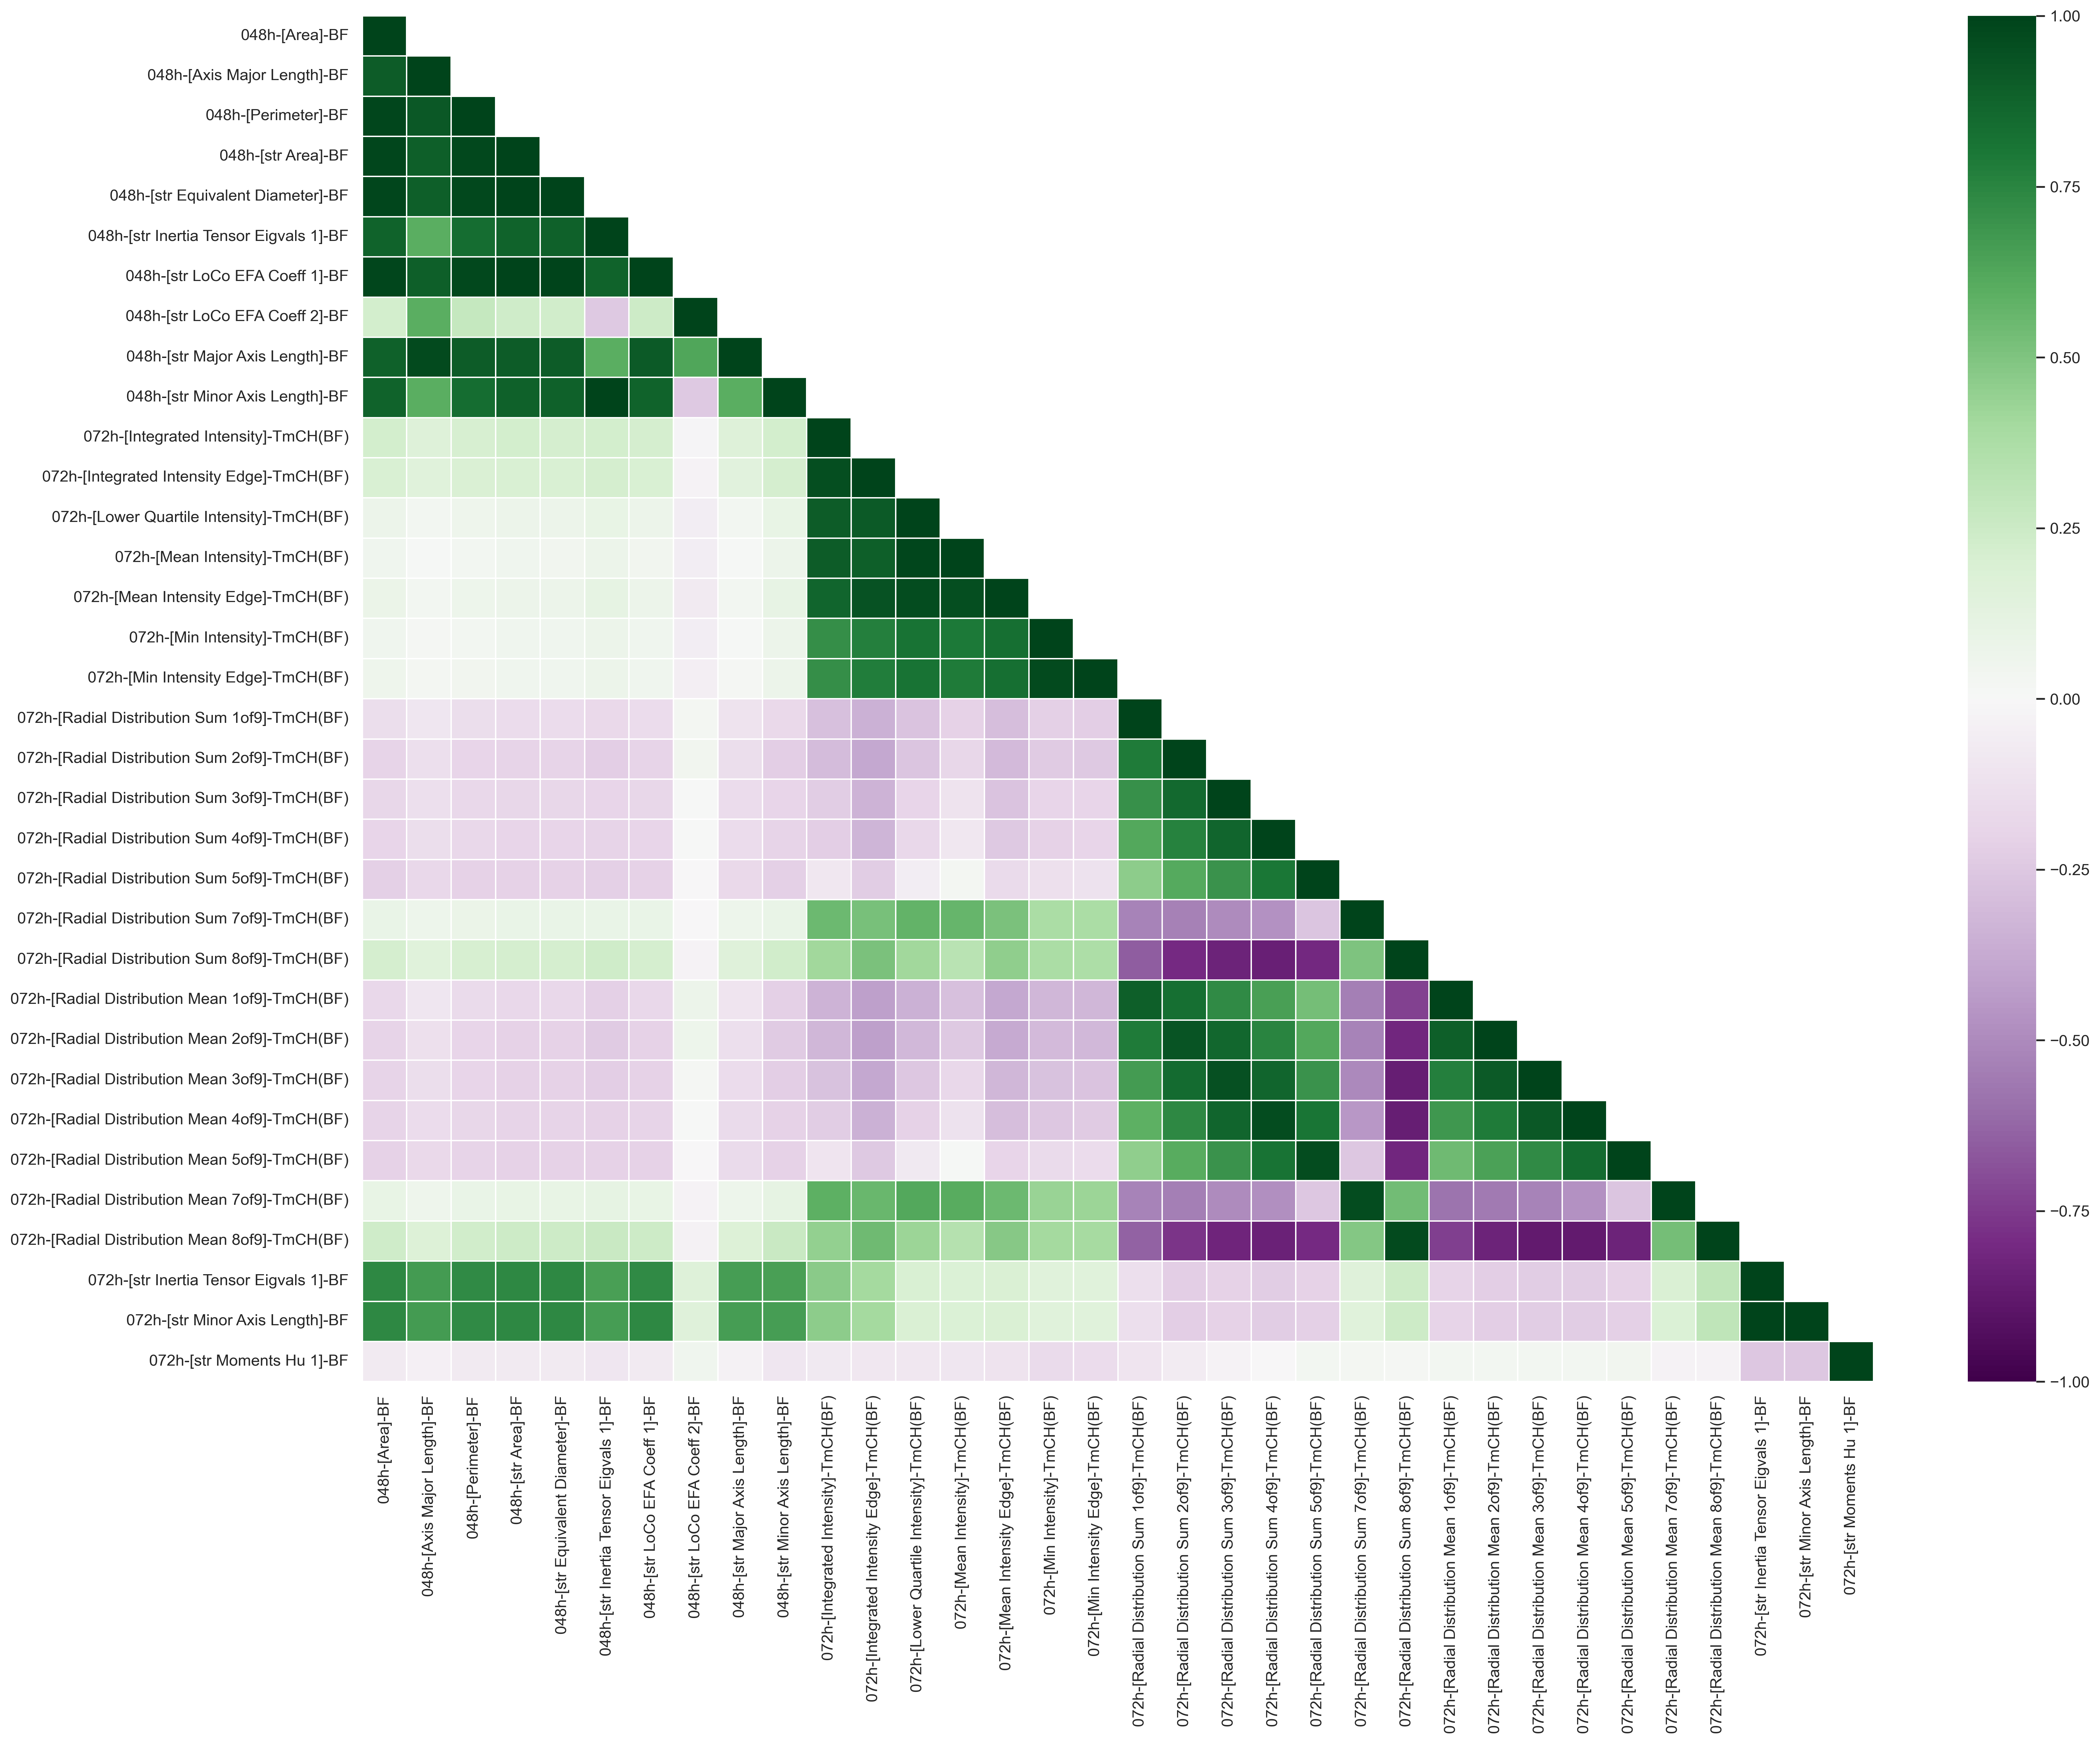

In [14]:
corr_analysis = X.rename(columns = name_mapping)[main_contributers].corr()
fig,ax = plt.subplots(1,1,figsize = (22,17))

mask = np.ones(corr_analysis.shape, dtype= bool)
mask = np.triu(mask, k = 1)

sns.heatmap(corr_analysis, cmap = "PRGn",vmin=-1, vmax=1, xticklabels='auto', yticklabels='auto', mask=mask, ax=ax,linewidths=0.5)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

# Main Contributors (0.01 and 0.99 percentile)

Identifies a new list of main contributing variables based on even stricter quantiles (1st and 99th percentiles) and outputs this list.

In [15]:
quantiles_upper = np.quantile(loadings_df,0.99,axis=0)
quantiles_lower = np.quantile(loadings_df,0.01,axis=0)
main_contributers = [
    key for key in loadings_df.index if (
        loadings_df.loc[key][0]>=quantiles_upper[0] or 
        loadings_df.loc[key][1]>=quantiles_upper[1] or 
        loadings_df.loc[key][0]<=quantiles_lower[0] or 
        loadings_df.loc[key][1]<=quantiles_lower[1]
    )
]
main_contributers

['048h-[Area]-BF',
 '048h-[str Area]-BF',
 '048h-[str Equivalent Diameter]-BF',
 '072h-[Integrated Intensity Edge]-TmCH(BF)',
 '072h-[Radial Distribution Sum 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 8of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 8of9]-TmCH(BF)']

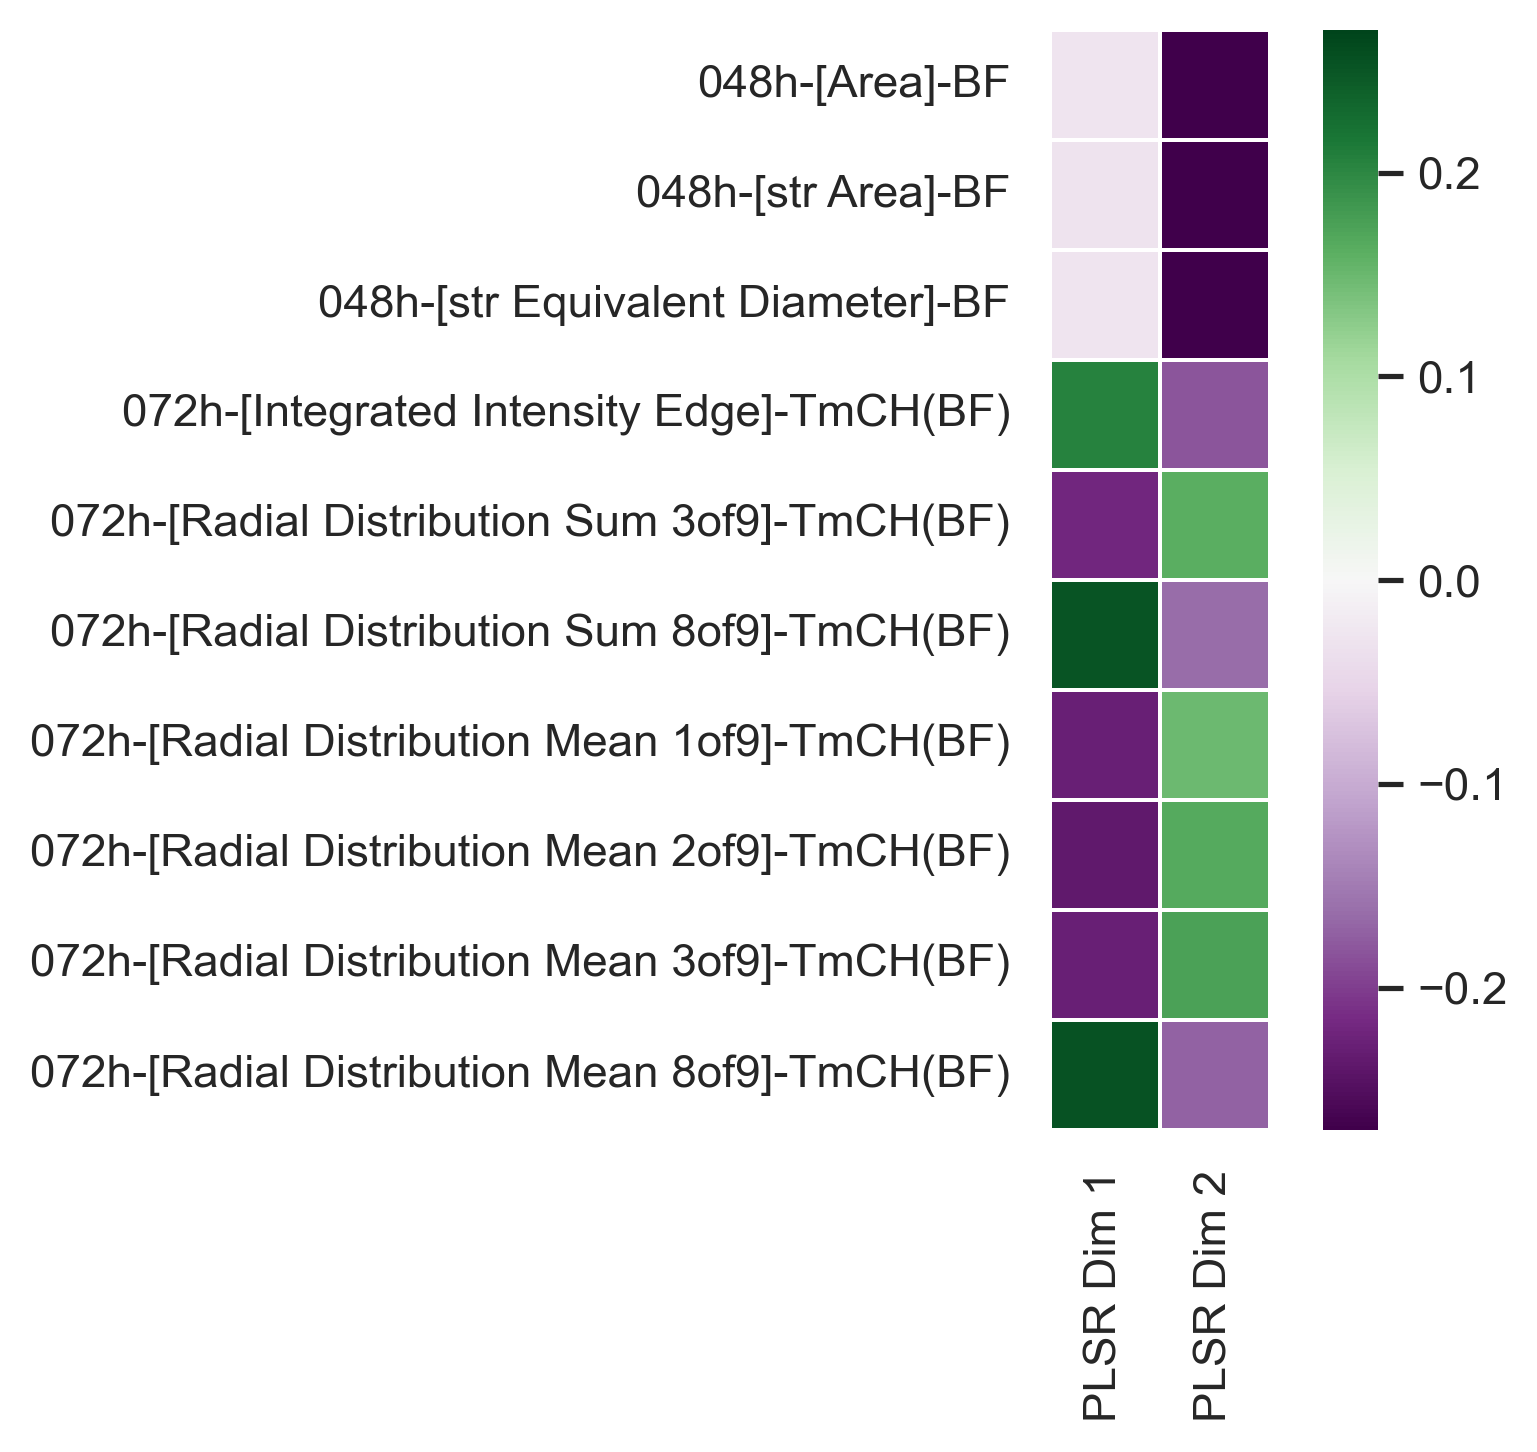

In [16]:


fig,ax = plt.subplots(1,1,figsize = (5,5))

sns.heatmap(loadings_df.loc[main_contributers], cmap = "PRGn",vmin=-0.27, vmax=0.27, xticklabels='auto', yticklabels='auto', ax=ax,linewidths=0.5,square=True)
ax.set_facecolor('white')

plt.tight_layout()
#plt.savefig(f"{out_fig_2}/PLSR Axes loadings 0.01 quantile.pdf", format="pdf", bbox_inches="tight")
plt.show()